# A Review : Graph Convolutional Networks (GCN)
<hr/>

![gcn_arch](gcn_architecture.png)

## Introduction

### Graphs

Who are we kidding! You may skip this section if you know what graphs are.

If you are here and haven't skipped this section, then, we assume that you are a complete beginner, you may want to read everything very carefully. We can define a graph as a picture that represent the data in an organised manner. Let's go deep into applied graph theory. A graph (being directed or undirected) consists of set of vertices (or nodes) denoted by V and a set of edges denoted by E. Edges can be weighted or binary. Let's have a look of a graph. 

![img](graph.png)

In the above graph we have:-

$$V = \{A, B, C, D, E, F, G\}$$

$$E = \{(A,B), (B,C), (C,E), (B,D), (E,F), (D,E), (B,E), (G,E)\}$$

Above all these edges their corresponding weights have been specified. These weights can represent different quantities.For example if we consider these nodes as different cities, edges can be the distance between these cities.

<hr/>

### Terminology

You may skip this as well, if comfortable.

![Adjacency Matrix](Adjacency_Matrix.jpg)

 - __Node__ : A node is an entity in the graph. Here, represented  by circles in the graph.
 - __Edge__ : It is the line joining two nodes in a graph. Presence of an edge between two nodes represent the relationship between the nodes. Here, represented by straight lines in the graph.
 - __Degree of a vertex__ : The degree of a vertex V of a graph G (denoted by deg (V)) is the number of edges incident with the vertex V. As an instance consider node B, it has 3 outgoing edges and 1 incoming edge, so outdegree is 3 and indegree is 1.
 - __Adjacency Matrix__ : It is a method of representing a graph using only a square Matrix. Suppose there are N nodes in a graph then there will be N rows and N columns in the corresponding adjacency matrix. The i'th row will contain a 1 in the j'th column if there is an edge between the i'th and the j'th node, otherwise, it will contain a 0.

## Why GCNs?

So let's get into the real deal. Looking around us, we can observe that most of the real-world datasets come in the form of graphs or networks: social networks, protein-interaction networks, the World Wide Web, etc. This makes learning on graphs a very interesting problem that can solve tonnes of domain specific tasks rendering us with insightful information.

**But why can't these Graph Learning problems be solved by conventional Machine Learning/Deep Learning algorithms like CNNs? Why exactly was there a need for making a whole new class of networks?**

    A) To introduce a new XYZNet?
    B) To publish the 'said' novelty in a top tier conference?
    C) To you know what every other paper aims to achieve? 

No! No! No! Not because *Kipf and Welling* wanted to sound cool and publish yet another paper in a top tier conference. You see, not everything is an Alchemy :P. On that note I'd really suggest watching this super interesting, my favourite [talk](https://www.youtube.com/watch?v=x7psGHgatGM) by Ali Rahimi which is really relevant today in the ML world.

So getting back to the topic, obviously I'm joking about these things, and surely this is a really nice contribution and GCNs are really powerful,Ok! Honestly, take the last part with a pinch of salt and **remember** to ask me at the end.

<hr/>

**But I, still haven't answered the big elephant in the room. WHY?** 

To answer the why, we first need to understand how a class of models like Convolutional Neural Networks(CNNs) work. CNNs are really powerful, they have the capacity to learn very high dimensional data. Say you have a $512*512$ pixels image. The dimensionality here is approximately 1 million. For 10 samples 
the space becomes $10^{1,000,000}$ and CNNs have proven to work really well on such tough task settings! 

But, there is a catch! These data samples like images, videos, audio etc., where CNN models are mostly used all have a specific compositionality which is one of the strong assumptions we made before using CNNs. Never really knew what this assumption really meant ehh?

So CNNs basically extract the compositional features and feed them to the classifier.
<hr/>

**What do I mean by compositionality?**

The Key properties of the assumption of compositionality are

* Locality

* Stationarity or Translation Invariance    

* Multi Scale : Learning Hierarchies of representations

If you haven't figured it out, not all types of data lie on the Euclidean Space and such data types including graphs, manifolds and 3D objects do not align with this assumption. Hence, the need for GCNs which have the ability to capture the inherent structure and topology of the given graph. Hence this blog :P.

### Appllications of GCNs
One possible application of GCN is in the Facebook's friend prediction algorithm. Consider three people <i>A</i>, <i>B</i> and <i>C</i>. Given that <i>A</i> is a friend of <i>B</i>, <i>B</i> is a friend of <i>C</i>. You may also have some representative information in the form of features about each person, for example, <i>A</i> may like movies starring Liam Neeson and in general <i>C</i> is a fan of genre Thriller, now you have to predict whether <i>A</i> is friend of <i>C</i>.

| ![space-1.jpg](GCN_FB_Link_Prediction_Social_Nets.jpg) | 
|:--:| 
| __Facebook Link Prediction for Suggesting Friends using Social Networks__ |

## What GCNs?

As the name suggests, Graph Convolution Networks (GCNs), draw on the idea of Convolution Neural Networks re-defining them for the non-euclidean data domain. A regular Convolutional Neural Network used popularly for Image Recognition, captures the surrounding information of each pixel of an image. Similar to euclidean data like images, the convolution framework here aims to capture neighbourhood information for non euclidean spaces like graph nodes.

A GCN is basically a neural network that operates on a graph. It will take a graph as an input and give some (we'll see what exactly) meaningful output.

**GCNs come in two different styles**: 

 - **Spectral GCNs**: Spectral-based approaches define graph convolutions by introducing filters from the perspective of graph signal processing based on graph spectral theory.
 - **Spatial GCNs**: Spatial-based approaches formulate graph convolutions as aggregating feature information from neighbours.

Note: Spectral approach has the limitation of the graph structure being same for all samples i.e. homogeneous structure. But it is a hard constraint, as most of the real-world graph data has different structures and size for different samples i.e. heterogeneous structure. Spatial approach is agnostic of graph structure.

## How GCNs?

First, let's work this out for the Friend Prediction problem and then we will generalize the approach.

**Problem Statement**: You are given N people and also a graph where there is an edge between two people if they are friends. You need to predict whether two people will become friends in the future or not.

A simple graph corresponding to this problem is:
![img](friends_graph.png)
Here person $(1,2)$ are friends, similarly $(2,3), (3,4), (4,1), (5,6), (6,8), (8,7), (7,6)$ are also friends.

Now we are interested in finding out whether a given pair of people are likely to become friends in the future or not. Let's say that the pair we are interested in is $(1,3)$, now since they have 2 common friends we can softly imply they have a chance of becoming friends, whereas the nodes $(1,5)$ have no friend in common so they are less likely to become friends.

Lets take another example:
![img](friends_graph2.png)
Here $(1,11)$ are much more likely to become friends than say $(3, 11)$.


Now the question that one can raise is 'How to implement and achieve this result?'. GCN's implement it in a way similar to CNNs. In a CNN we apply a filter on the original image to get the representation in next layer. Similarly in GCN we apply a filter which creates the next layer representation. 

Mathematically we can define as follows: $$H^{i} = f(H^{i-1}, A)$$


A very simple example of $f$ maybe:

$$f(H^{i}, A) = σ(AH^{i}W^{i})$$


where
 - $A$ is the $N × N$ adjacency matrix
 - $X$ is the input feature matrix $N × F$, where $N$ is the number of nodes and $F$ is the number of input features for each node.
 - $σ$ is the Relu activation function
 - $H^{0} = X$ Each layer $H^{i}$ corresponds to an $N × F^{i}$ feature matrix where each row is a feature representation of a node.
 - $f$ is the propagation rule
 
At each layer, these features are aggregated to form the next layer’s features using the propagation rule $f$. In this way, features become increasingly more abstract at each consecutive layer.


Yes that is it, we already have some function to propagate information across the graphs which can be trained in a semi-supervised way. Using the GCN layer, the representation of each node (each row) is now a sum of its neighbors features! In other words, the layer represents each node as an aggregate of its neighborhood.

**But, Wait is it so simple?**

I'll request you to stop for a moment here and think really hard about the function we just defined.

Is that correct?

**STOP**

....

....

....


It is not! If you were unable to arrive at the problem, fret not. Let's see what the 'problem' or let me restate it as the **'problems'** this function might lead to:
 - **The new node features $H^{i}$ are not a function of its previous representation**: As you might have noticed, the aggregated representation of a node is only a function of its neighbours and does not include its own features. If not handled, this may lead to the loss of the node identity and hence rendering the feature representations useless. We can easily fix this by adding self loops, that is an edge starting and ending on the same node, in this way a node will become a neighbour of itself. Mathematically, self loops are nothing but can be expressed by adding the node identity 


 - **Degree of the nodes lead to the values being scaled asymmetricaly across the graph**: In simple words, nodes that have large number of neighbours (higher degree) will get much more input in the form of neighborhood aggregation from the adjacent nodes and hence will have a larger value and vice versa may be true for nodes with smaller degrees having small values. This can lead to problems during training the network. To deal with the issue, we will be using normalisation i.e, reduce all values in such a way that the values are on the same scale. Normalizing $A$ such that all rows sum to one, i.e. $D^{−1}A$, where $D$ is the diagonal node degree matrix, gets rid of this problem. Multiplying with $D^{−1}A$ now corresponds to taking the average of neighboring node features. According to the authors, after observing emperical results, they suggest "In practice, dynamics get more interesting when we use a symmetric normalization, i.e. $\hat{D}^{-\frac{1}{2}}\hat{A}\hat{D}^{-\frac{1}{2}}$ (as this no longer amounts to mere averaging of neighboring nodes).
 
 
After addressing the two problems stated above, the new propagation function $f$ is:

$$f(H^{(l)}, A) = \sigma\left( \hat{D}^{-\frac{1}{2}}\hat{A}\hat{D}^{-\frac{1}{2}}H^{(l)}W^{(l)}\right)$$


where
 - $\hat{A} = A + I$
 - $I$ is the identity matrix
 - $\hat{D}$  is the diagonal node degree matrix of $\hat{A}$.

# Implementing GCNs from Scratch in PyTorch 

We are now ready to put all of the tools together to deploy our very first fully-functional Graph Convolutional Network. In this tutorial we will be training GCN on the 'Zachary Karate Club Network'. We will be using the **'Semi Supervised Graph Learning Model'** proposed in the paper by [Thomas Kipf and Max Welling](https://arxiv.org/abs/1609.02907).

### Zachary Karate Club

During the period from 1970-1972, Wayne W. Zachary, observed the people belonging to a local karate club. He represented these people as nodes in a graph. And added a edge between a pair of people if they interacted with each other. The result was a the graph shown below.
![img](karate_club.png)

During the study an interesting event happened. A conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. 

Using the graph that he had found earlier, he tried to predict which member will go to which half. And surprisingly he was able to predict the decision of all the members except for node 9 who went with Mr. Hi instead of John A. Zachary used the maximum flow – minimum cut Ford–Fulkerson algorithm for this. We will be using a different algorithm today, hence it is not required to know about Ford-Fulkerson algorithm.

Here we will be using the Semi Supervised Graph Learning Method. Semi Supervised means that we have labels for only some of the nodes and we have find the labels for other nodes. Like in this example we have the labels for only the nodes belonging to 'John A' and 'Mr. Hi', we have not been provided with labels for any other member and we have be predict that only on the basis of the graph given to us.

### Loading Required Libraries
In this post we will be using PyTorch and Matplotlib.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import imageio

### The Convolutional Layer
First we will be creating the GCNConv class, which will serve as the Layer creation class. Every instance of this class will be getting Adjacency Matrix as input and will be outputing 'RELU(A_hat * X * W)', which the Net class will use.

In [2]:
class GCNConv(nn.Module):
    def __init__(self, A, in_channels, out_channels):
        super(GCNConv, self).__init__()
        self.A_hat = A+torch.eye(A.size(0))
        self.D     = torch.diag(torch.sum(A,1))
        self.D     = self.D.inverse().sqrt()
        self.A_hat = torch.mm(torch.mm(self.D, self.A_hat), self.D)
        self.W     = nn.Parameter(torch.rand(in_channels,out_channels, requires_grad=True))
    
    def forward(self, X):
        out = torch.relu(torch.mm(torch.mm(self.A_hat, X), self.W))
        return out

The Net  class will combine multiple Conv layer.

In [3]:
class Net(torch.nn.Module):
    def __init__(self,A, nfeat, nhid, nout):
        super(Net, self).__init__()
        self.conv1 = GCNConv(A,nfeat, nhid)
        self.conv2 = GCNConv(A,nhid, nout)
        
    def forward(self,X):
        H  = self.conv1(X)
        H2 = self.conv2(H)
        return H2

In [4]:
# 'A' is the adjacency matrix, it contains 1 at a position (i,j) if there is a edge between the node i and node j.
A=torch.Tensor([[0,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0],
                [1,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0],
                [1,1,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0],
                [1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1],
                [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
                [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1],
                [0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1],
                [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1],
                [0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,1,0,1],
                [0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,0]
                ])

In this example we have the label for admin(node 1) and instructor(node 34) so only these two contain the class label(0 and 1) all other are set to -1, which means that the predicted value of these nodes will be ignores in the computation of loss function.

In [5]:
target=torch.tensor([0,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,-1,-1,-1, -1, -1, -1, -1,-1,1])

X is the feature matrix. Since we dont have any feature of each node, we will just be using the one-hot encoding corresponding to the index of the node.

In [6]:
X=torch.eye(A.size(0))

Here we are creating a Network with 10 features in the hidden layer and 2 in output layer.

In [7]:
T=Net(A,X.size(0), 10, 2)

### Training

In [8]:
criterion = torch.nn.CrossEntropyLoss(ignore_index=-1)
optimizer = optim.SGD(T.parameters(), lr=0.01, momentum=0.9)

In [9]:
loss=criterion(T(X),target)

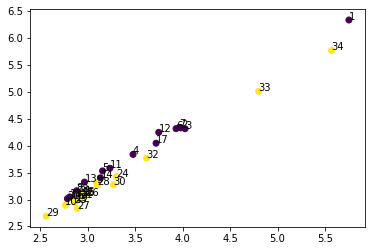

Cross Entropy Loss: = 0.8178678750991821


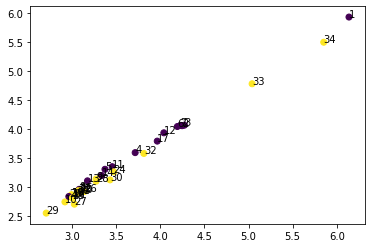

Cross Entropy Loss: = 0.7483316659927368


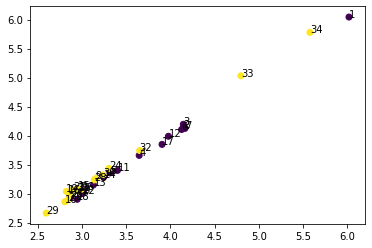

Cross Entropy Loss: = 0.6594112515449524


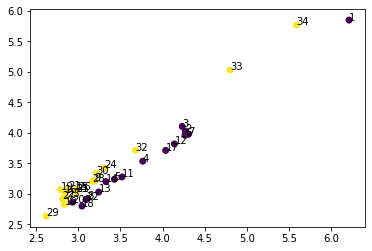

Cross Entropy Loss: = 0.5761473178863525


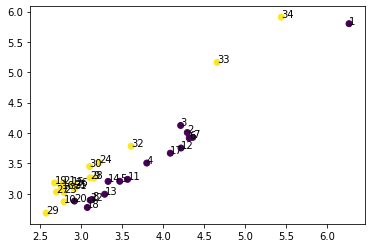

Cross Entropy Loss: = 0.49485743045806885


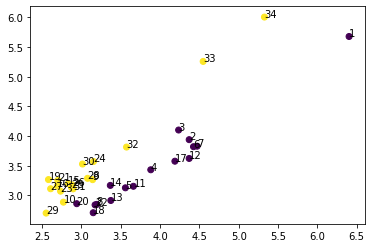

Cross Entropy Loss: = 0.41121095418930054


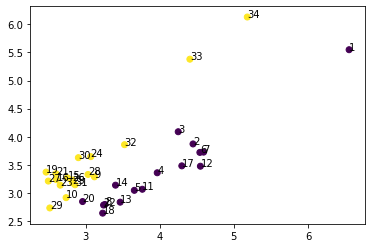

Cross Entropy Loss: = 0.32750385999679565


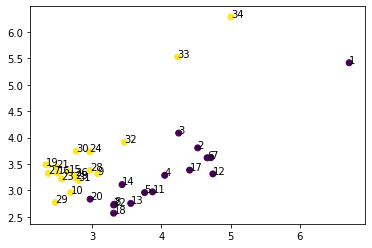

Cross Entropy Loss: = 0.25075453519821167


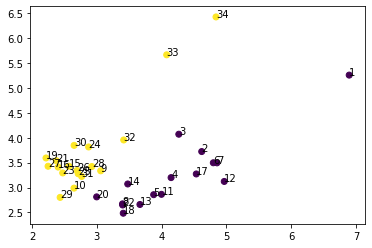

Cross Entropy Loss: = 0.18746334314346313


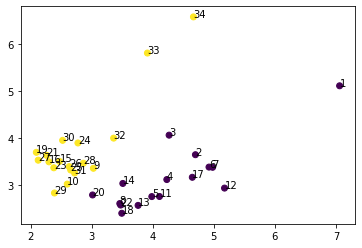

Cross Entropy Loss: = 0.13979440927505493


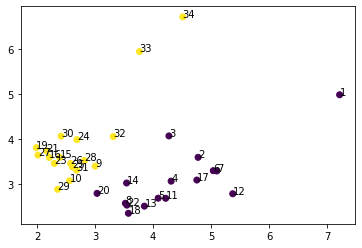

Cross Entropy Loss: = 0.10588118433952332


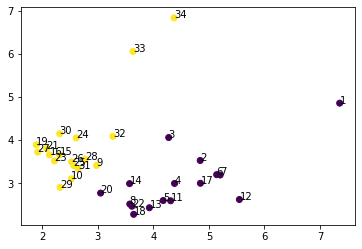

Cross Entropy Loss: = 0.08227509260177612


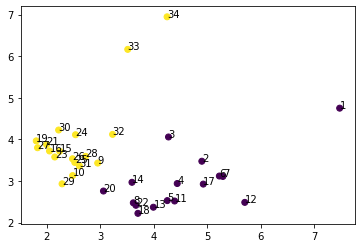

Cross Entropy Loss: = 0.06576760113239288


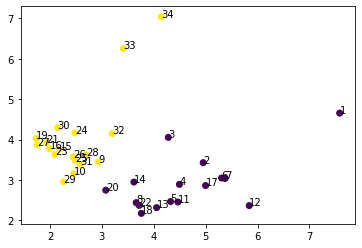

Cross Entropy Loss: = 0.0539877712726593


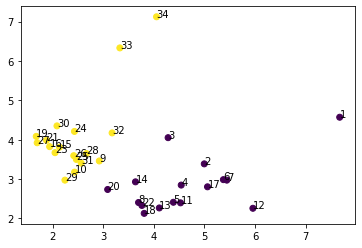

Cross Entropy Loss: = 0.045352302491664886


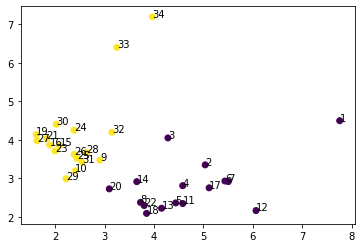

Cross Entropy Loss: = 0.03884197026491165


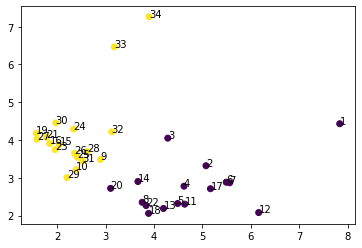

Cross Entropy Loss: = 0.033803340047597885


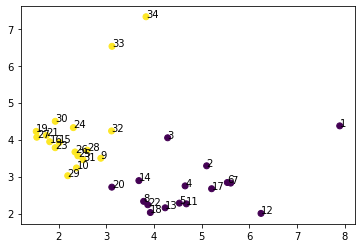

Cross Entropy Loss: = 0.02981167659163475


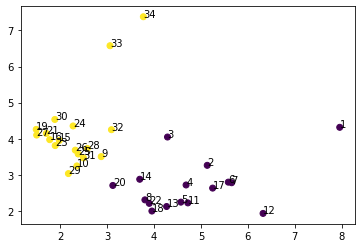

Cross Entropy Loss: = 0.026584960520267487


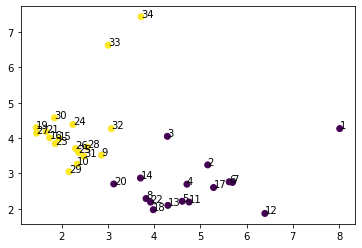

Cross Entropy Loss: = 0.023930732160806656


In [10]:
for i in range(200):
    optimizer.zero_grad()
    loss=criterion(T(X), target)
    loss.backward()
    optimizer.step()
    l=(T(X));
    
    # Plot for every 10 steps
    if i%10==0:
        plt.scatter(l.detach().numpy()[:,0],l.detach().numpy()[:,1],c=[0, 0, 0, 0 ,0 ,0 ,0, 0, 1, 1, 0 ,0, 0, 0, 1 ,1 ,0 ,0 ,1, 0, 1, 0 ,1 ,1, 1, 1, 1 ,1 ,1, 1, 1, 1, 1, 1 ])
        for i in range(l.shape[0]):
            plt.text(l[i,0], l[i,1], str(i+1))
        plt.show()
        print("Cross Entropy Loss: =", loss.item())
    

As you can see above it has divided the data in two categories , and its close to the actual predictions. __TODO__ Actual labels.
<hr/>

## PyTorch Geometric Implementation
We also implemented GCNs using this great library [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric) (PyG) with a super active mantainer [Matthias Fey](https://github.com/rusty1s/). PyG is specifically built for PyTorch lovers who need an easy, fast and simple way out to implement and test their work on various Graph Representation Learning papers.

You can find the PyG notebook [here](TODO: Add link) with implementation of GCNs trained on a Citation Network, the Cora Dataset.
<hr/>

We strongly reccomend reading up these references as well to make your understanding solid. 

**Also, remember I asked you to remember one thing? To answer that read up on this amazing blog which tries to understand if GCNs really are powerful as they claim to be. [How powerful are Graph Convolutions?](https://www.inference.vc/how-powerful-are-graph-convolutions-review-of-kipf-welling-2016-2/)**


## References
- [Blog GCNs by Thomas Kipf](https://tkipf.github.io/graph-convolutional-networks/)
- [Semi-Supervised Classification with Graph Convolutional Networks by Thomas Kipf and Max Welling](https://arxiv.org/abs/1609.02907)
- [How to do Deep Learning on Graphs with Graph Convolutional Networks by Tobias Skovgaard Jepsen
](https://towardsdatascience.com/how-to-do-deep-learning-on-graphs-with-graph-convolutional-networks-7d2250723780)
- [How powerful are Graph Convolutions?](https://www.inference.vc/how-powerful-are-graph-convolutions-review-of-kipf-welling-2016-2/)
- [PyTorch Geometric](https://github.com/rusty1s/pytorch_geometric)
<hr/>


## Written By

* Ajit Pant
* Shubham Chandel
* Shashank Gupta
* Anirudh Dagar